In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors

# Color Mapping

- Build a colour mapping by linear interpolation
- Combine with a `ScalarMappable` to generate a mapping from intensity to colour

In [2]:
data = np.random.random(size=(20,20))

In [22]:
cdict = {'red':   [(0.0,  1.0, 1.0),
                   (1.0,  1.0, 1.0)],

         'green': [(0.0,  1.0, 1.0),
                   (1.0,  0.0, 0.0)],

         'blue':  [(0.0,  0.2, 0.2),
                   (1.0,  0.2, 0.2)]}
my_cmap = matplotlib.colors.LinearSegmentedColormap("mycmap", cdict)
mappable = plt.cm.ScalarMappable(cmap=my_cmap)
mappable.set_array(data)
mappable.autoscale()

print(mappable.to_rgba(0.1))
print(mappable.to_rgba(0.5))
print(mappable.to_rgba(0.9))

(1.0, 0.90588235294117647, 0.20000000000000001, 1.0)
(1.0, 0.50196078431372548, 0.20000000000000001, 1.0)
(1.0, 0.098039215686274495, 0.20000000000000001, 1.0)


# Patches and manual colour bars

- Place individual retangles.
- Can this be done differently / more efficiently with an `artist`??

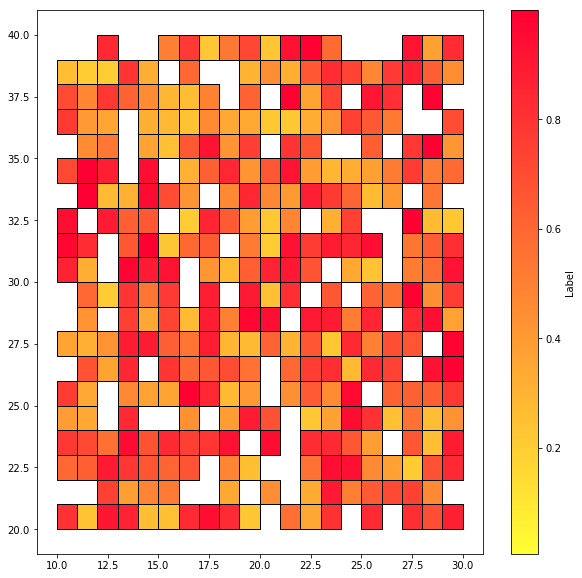

In [4]:
import matplotlib.patches

fig, ax = plt.subplots(figsize=(10,10))

for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        if data[y][x] > 0.2:
            xs = 10 + x
            ys = 20 + y
            c = mappable.to_rgba(data[y][x])
            p = matplotlib.patches.Rectangle((xs, ys), 1, 1,
                                             facecolor=c, edgecolor="black", linewidth=1)
            ax.add_patch(p)

ax.set(xlim=(9,31), ylim=(19,41))

cbar = fig.colorbar(mappable, orientation="vertical")
cbar.set_label("Label")
None

# Line Collections

- Basic usage
- Usage with a colour map

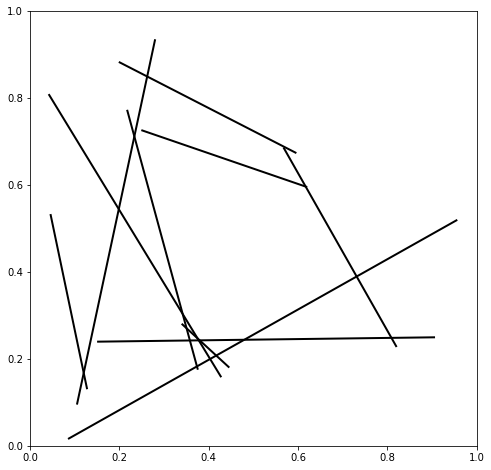

In [13]:
lines = []
for x, y in zip(np.random.random(size=(10,2)), np.random.random(size=(10,2))):
    lines.append( (x,y) )

fig, ax = plt.subplots(figsize=(8,8))
lc = matplotlib.collections.LineCollection(lines, color="black", linewidth=2)
ax.add_collection(lc)

[(0, 10), (0, 10)]

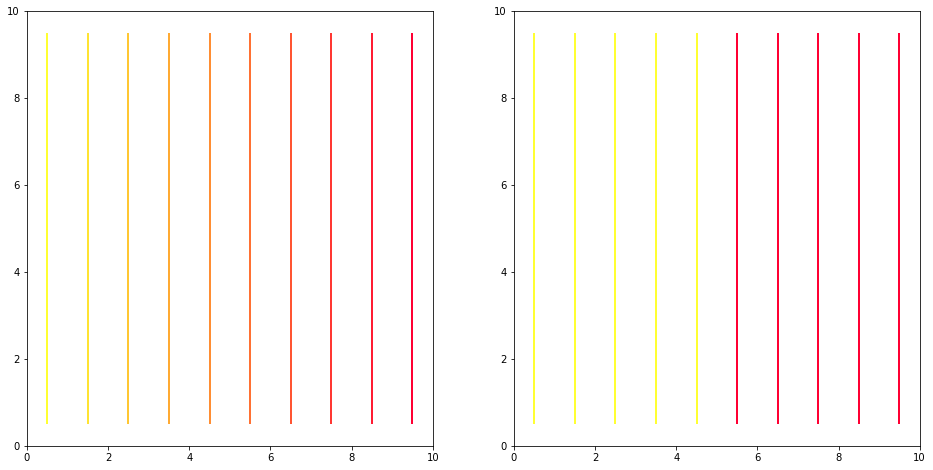

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(16,8))

lines = []
for x in range(10):
    lines.append( ((x+0.5,0.5), (x+0.5,9.5)) )

ax = axes[0]
lc = matplotlib.collections.LineCollection(lines, linewidth=2)
lc.set_array(np.asarray([0,1,2,3,4,5,6,7,8,9]))
lc.set(cmap=my_cmap, norm=None)
ax.add_collection(lc)
ax.set(xlim=[0,10], ylim=[0,10])

ax = axes[1]
lc = matplotlib.collections.LineCollection(lines, linewidth=2)
lc.set_array(np.asarray([0,1,2,3,4,5,6,7,8,9]))
n = matplotlib.colors.Normalize(vmin=4, vmax=5)
lc.set(cmap=my_cmap, norm=n)
ax.add_collection(lc)
ax.set(xlim=[0,10], ylim=[0,10])